*First compiled: May 2, 2017.*

## Myeloid progenitor data of [Paul *et al.*, Cell (2015)](https://doi.org/10.1016/j.cell.2015.11.013)

Hematopoiesis: trace myeloid and erythroid differentiation.

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc

sc.settings.verbosity = 3                # amount of output
sc.settings.set_dpi(80)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+14.gdc3fb50.dirty on 2017-09-13 20:48.


### Preprocessing

In [4]:
adata = sc.examples.paul15_raw()
sc.write('paul15_raw', adata)
sc.pp.recipe_zheng17(adata, plot=False)
sc.write('paul15', adata)

reading sheet data.debatched from file data/paul15/paul15.h5
reading sheet cluster.id from file data/paul15/paul15.h5
reading sheet info.genes_strings from file data/paul15/paul15.h5
writing ./write/paul15_raw.h5
normalizing by total count per cell
    finished (0:00:00.101) normalized adata.X and added
    "n_counts_all", counts per cell before normalization (adata.smp)
filter highly varying genes by dispersion and mean (0:00:00.050)
normalizing by total count per cell
    finished (0:00:00.019) normalized adata.X and added
    "n_counts", counts per cell before normalization (adata.smp)
writing ./write/paul15.h5


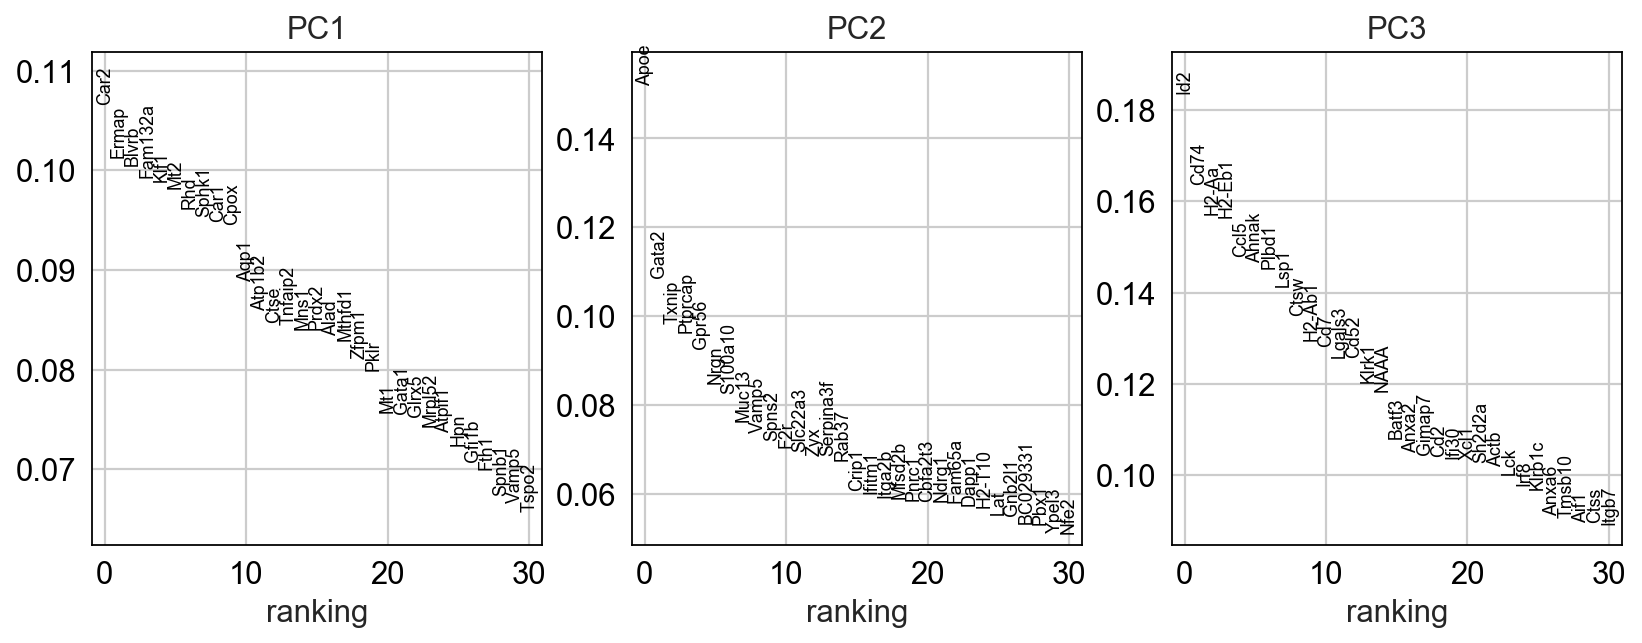

In [5]:
sc.tl.pca(adata)
sc.pl.pca_loadings(adata)

## Visualization

In [6]:
adata = sc.read('paul15')
sc.tl.tsne(adata, n_pcs=30)
sc.write('paul15', adata)

reading file ./write/paul15.h5
computing tSNE
    preprocess using PCA with 30 PCs
--> avoid this by setting n_pcs = 0
    using 30 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:07.022) and added
    "X_tsne", tSNE coordinates (adata.smp)
writing ./write/paul15.h5


reading file ./write/paul15.h5


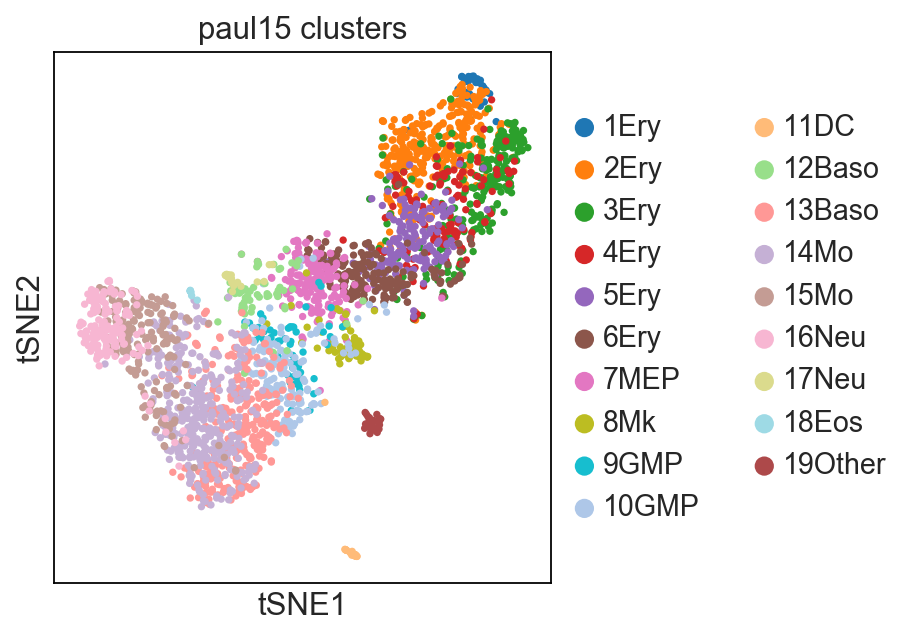

In [7]:
adata = sc.read('paul15')
ax = sc.pl.tsne(adata, color='paul15_clusters')

Let us also visualize the data using the Fruchterman-Reingold algorithm.

In [8]:
adata = sc.read('paul15')
sc.tl.draw_graph(adata, n_neighbors=4, recompute_graph=True)
sc.write('paul15', adata)

reading file ./write/paul15.h5
drawing single-cell graph using layout "fr"
    compute "X_pca" for building graph
    computing data graph with n_neighbors = 4 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9966393709  0.9943132997  0.9864672422  0.981000483
      0.9788661599  0.9781615734  0.9748940468  0.9719734192  0.9651904702
      0.9590314627  0.952006042   0.9453957081  0.9388744831  0.9358919263]
    finished (0:00:48.599) and added
    "X_draw_graph_fr", graph_drawing coordinates (adata.smp)
    "draw_graph_layout", the chosen layout (adata.add)
writing ./write/paul15.h5


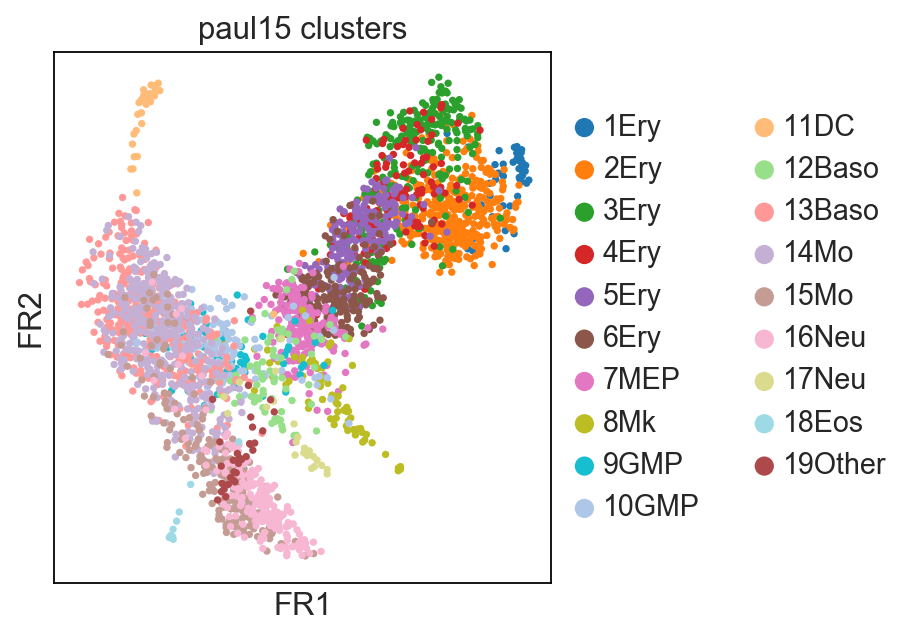

In [9]:
ax = sc.pl.draw_graph(adata, color='paul15_clusters')

Apparently, using the default settings, FR resolves the heterogeneity nicer than tSNE.

### Inferring the differentiation tree using graph abstraction

In [5]:
adata = sc.read('paul15')
adata.add['iroot'] = np.flatnonzero(adata.smp['paul15_clusters']  == '7MEP')[0]
sc.tl.aga(adata,
          tree_detection='greedy_extremes',
          n_neighbors=4,
          resolution=1.2)
sc.write('paul15', adata)

reading file ./write/paul15.h5
running Approximate Graph Abstraction (AGA)
    using "X_pca" for building graph
    using stored data graph with n_neighbors = 4 and spectrum
    [ 1.            0.9966393709  0.9943132997  0.9864672422  0.981000483
      0.9788661599  0.9781615734  0.9748940468  0.9719734192  0.9651904702]
    abstracted graph will have 16 nodes
... finished (0:00:00.489) --> added
    aga_adjacency_full_attachedness : np.ndarray in adata.add
        The full adjacency matrix of the abstracted graph, weights
        correspond to attachedness.
    aga_adjacency_full_confidence : np.ndarray in adata.add
        The full adjacency matrix of the abstracted graph, weights
        correspond to confidence in the presence of an edge.
    aga_adjacency_tree_confidence : sparse csr matrix in adata.add
        The weighted adjacency matrix of the most probable tree in the
        abstracted graph.
    aga_groups : np.ndarray of dtype string in adata.smp
        Group labels for 

... saving figure to file ./figures/draw_graph_fr.png


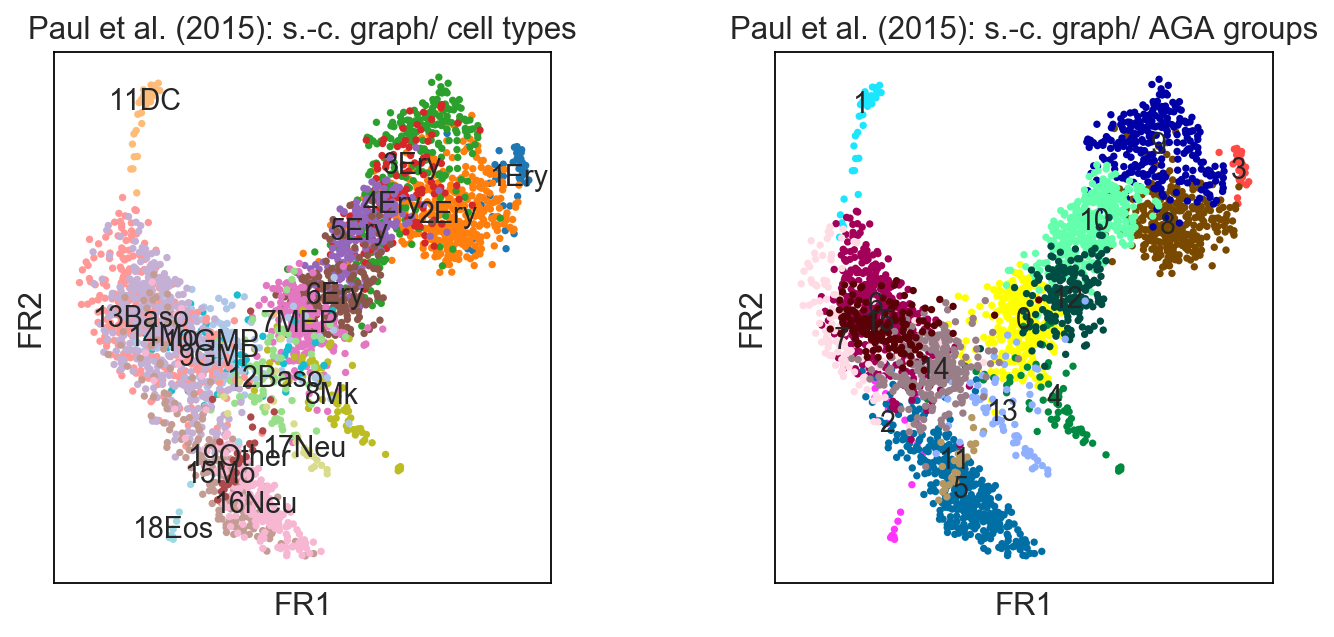

... saving figure to file ./figures/aga_graph.png


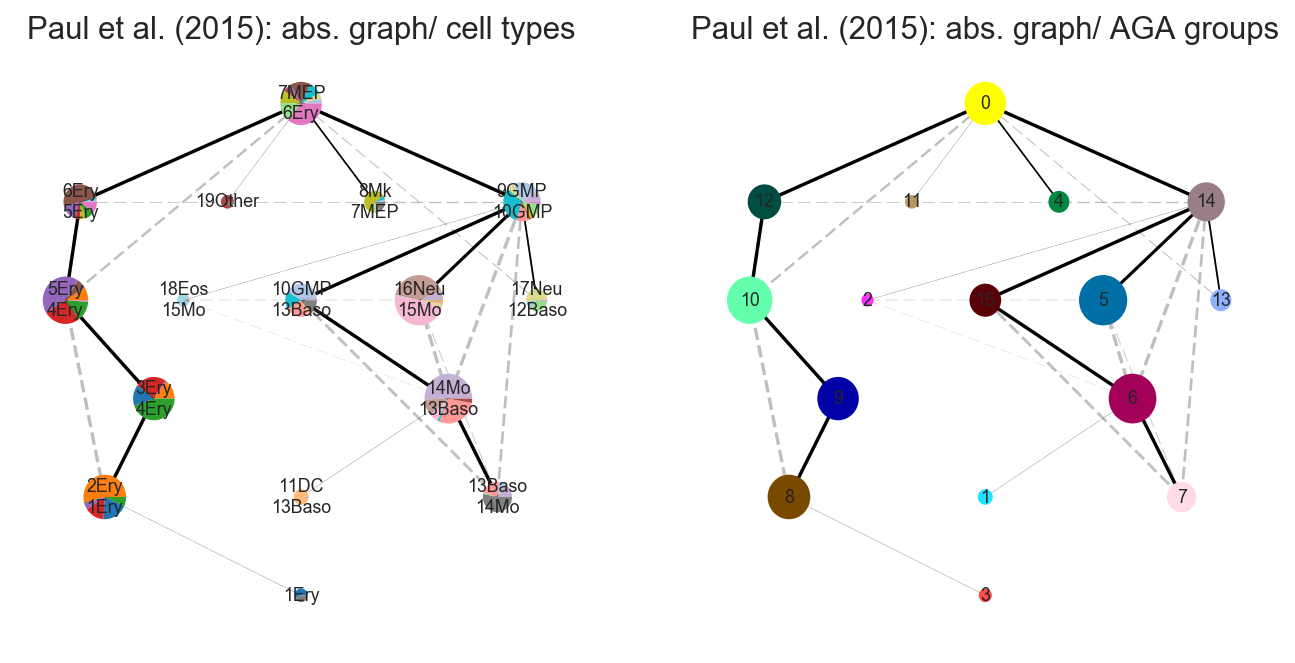

In [14]:
sc.pl.draw_graph(adata, color=['paul15_clusters', 'aga_groups'],
                 title=['Paul et al. (2015): s.-c. graph/ cell types',
                        'Paul et al. (2015): s.-c. graph/ AGA groups'],
                 palette=[sc.pl.palettes.vega_20, sc.pl.palettes.godsnot_64],
                 right_margin=[0.45, 0.1],
                 legend_loc='on data', save=True, show=True)
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='paul15_clusters',
    normalization='reference',
    max_n_names=2)
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.vega_20, asso_matrix)
ax = sc.pl.aga_graph(adata, root=0, layout='eq_tree',
                     colors=[asso_colors, sc.pl.palettes.godsnot_64],
                     groups=[asso_names, 'aga_groups'],
                     fontsize=8, save=True, show=True,
                     title=['Paul et al. (2015): abs. graph/ cell types',
                            'Paul et al. (2015): abs. graph/ AGA groups'] )

### Reconstruct dynamics for a given set of genes

Reconstruct the dynamics.

In [14]:
adata_all_genes = paul15_raw()
sc.pp.recipe_zheng17(adata_all_genes, n_top_genes=3000, plot=False)
adata_all_genes.smp['aga_groups'] = adata.smp['aga_groups']
adata_all_genes.smp['aga_pseudotime'] = adata.smp['aga_pseudotime']

reading sheet data.debatched from file data/paul15/paul15.h5
reading sheet cluster.id from file data/paul15/paul15.h5
reading sheet info.genes_strings from file data/paul15/paul15.h5


In [20]:
gene_names = ['Gata2', 'Gata1', 'Hba-a2', 'Gfi1', 'Elane', 'Irf8', 'Csf1r']

reading file ./write/paul15.h5
... saving figure to file ../figs_paul15/aga_path_erythrocytes.png


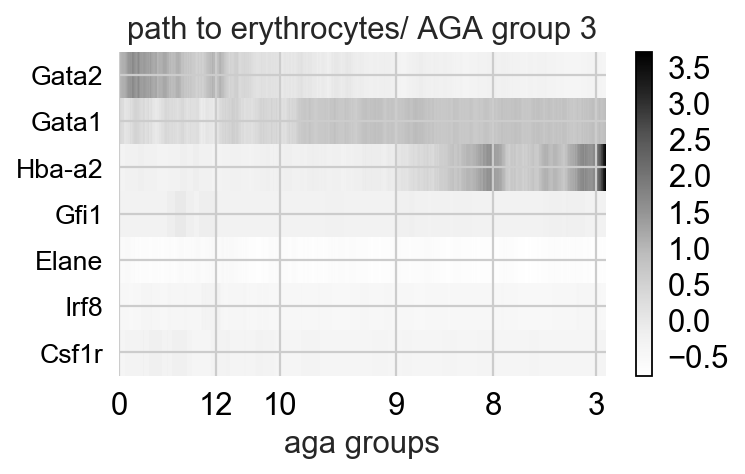

... saving figure to file ../figs_paul15/aga_path_neutrophils.png


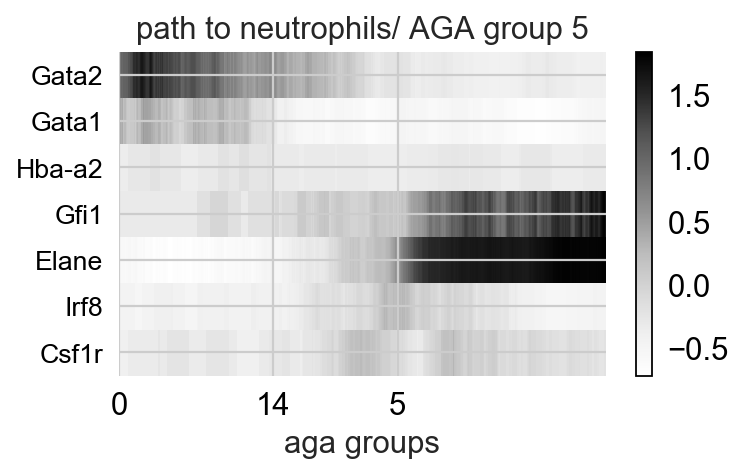

... saving figure to file ../figs_paul15/aga_path_monocytes.png


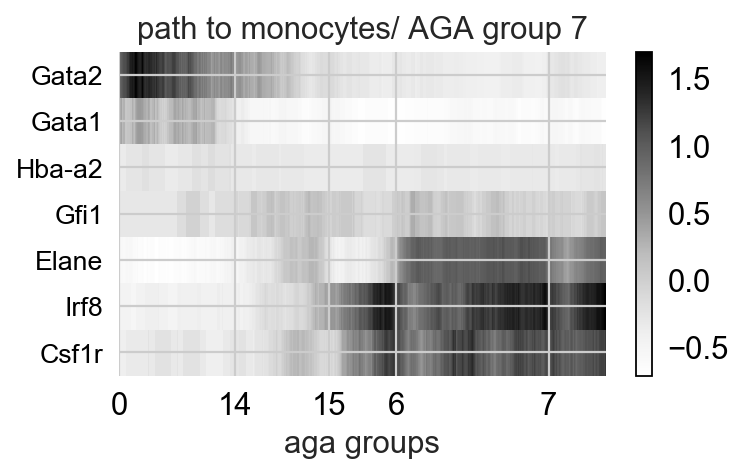

In [27]:
rcParams['figure.figsize'] = (5, 2.7)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.1
adata = sc.read('paul15')
paths = [('erythrocytes', [0, 12, 10, 9, 8, 3]), ('neutrophils', [0, 14, 5]), ('monocytes', [0, 14, 15, 6, 7])]
cell_types = ['1Ery', '17Neu', '14Mo']
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.aga_path(adata_all_genes,
                        nodes=path,
                        ytick_fontsize=12,
                        keys=gene_names,
                        n_avg=50,
                        title='path to ' + descr + '/ AGA group {}'.format(path[-1]),
                        normalize_to_zero_one=False,
                        save='_' + descr,
                        show=True)
sc.pl.reset_rcparams()